In [1]:
!pip install pyspike


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pickle
import numpy as np
import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:

  mdf1 = pickle.load(f)
print(mdf1)


ass = mdf1.analogsignals[0]   
vm_spiking = []
spike_trains = []

for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,len(ass)))
    spike_trains.append(pspikes)

    
    

/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.5/site-packages/scipy/stats/stats.py:998: RuntimeWarning: Mean of empty slice.
  return a.std(axis) / a.mean(axis)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


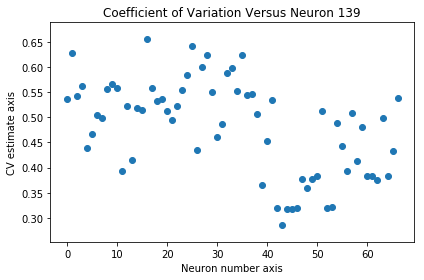

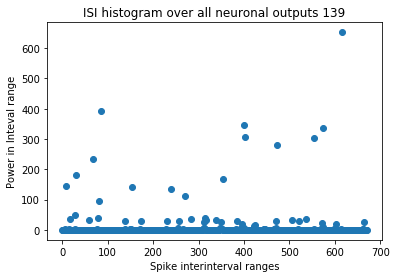

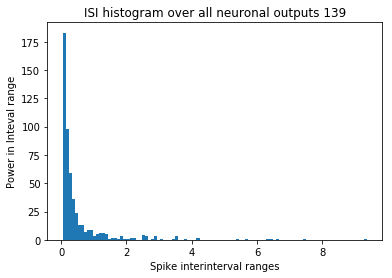

In [3]:

from elephant.statistics import cv
import matplotlib.pyplot as plt
import elephant

hist_cv = [0 for i in range(0,len(spike_trains))]
import numpy as np
for i,j in enumerate(spike_trains):
    cva = cv(j)
    if np.isnan(cva) or cva == 0:
        hist_cv[i] = 0
    else:    
        hist_cv[i] = cva
        #print(cva)
        
hist_cv = [i for i in hist_cv if i!=0 ]
x_axis = [i for i in range(0,len(hist_cv))]

plt.clf()
fig, axes = plt.subplots()
axes.set_title('Coefficient of Variation Versus Neuron {}'.format(i))
axes.set_xlabel('Neuron number axis')
axes.set_ylabel('CV estimate axis')
plt.scatter(x_axis,hist_cv)
fig.tight_layout()
plt.show()


plt.clf()
fig, axes = plt.subplots()
axes.set_title('ISI histogram over all neuronal outputs {}'.format(i))
axes.set_xlabel('Spike interinterval ranges')
axes.set_ylabel('Power in Inteval range')
unested_sp = []
for s in spike_trains:
    unested_sp.extend(s)
isi_hist = elephant.statistics.isi(sorted(unested_sp))
isi_hist = [i for i in isi_hist if i!=0 ]
plt.scatter([i for i in range(0,len(isi_hist))],isi_hist)
plt.show()


plt.clf()
fig, axes = plt.subplots()
axes.set_title('ISI histogram over all neuronal outputs {}'.format(i))
axes.set_xlabel('Spike interinterval ranges')
axes.set_ylabel('Power in Inteval range')
unested_sp = []
for s in spike_trains:
    unested_sp.extend(s)
isi_hist = elephant.statistics.isi(sorted(unested_sp))
isi_hist = [i for i in isi_hist if i<=10 and i >0.0315 ]
plt.hist(isi_hist,bins=100)
plt.show()

#for i in isi_hist:
#    print(i)




In [4]:
spike_trains[0]

In [5]:
import pyspike as spk
with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:

  mdf1 = pickle.load(f)
print(mdf1)


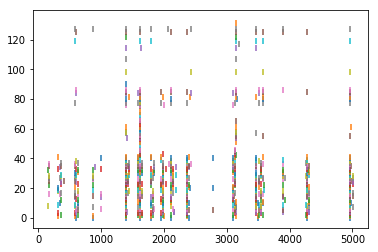

In [6]:


# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)
#tstop = 100
spike_trains = []

ass = mdf1.analogsignals[0]   
tstop = mdf1.t_stop

vm_spiking = []
for spiketrain in mdf1.spiketrains:
    vm_spiking.append(mdf1.analogsignals[0][spiketrain.annotations['source_id']])
    #spiketrain = mdf1.spiketrains[index]
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))
    spike_trains.append(pspikes)

# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()



ISI-distance: 0.10652690
SPIKE-distance: 0.06313133


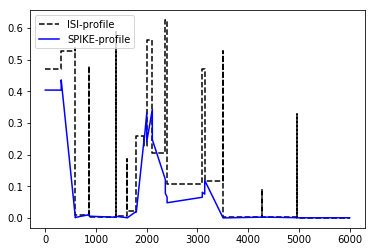

In [7]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

Average: 0.916666666667
Average: 0.318029466122


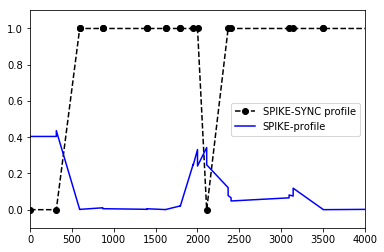

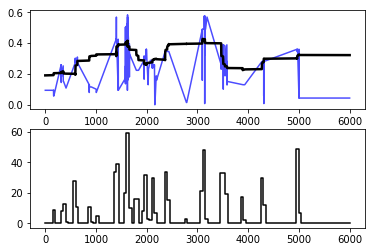

In [8]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

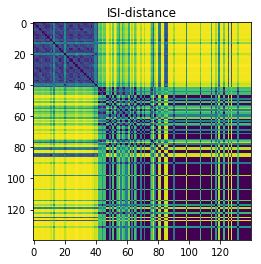

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


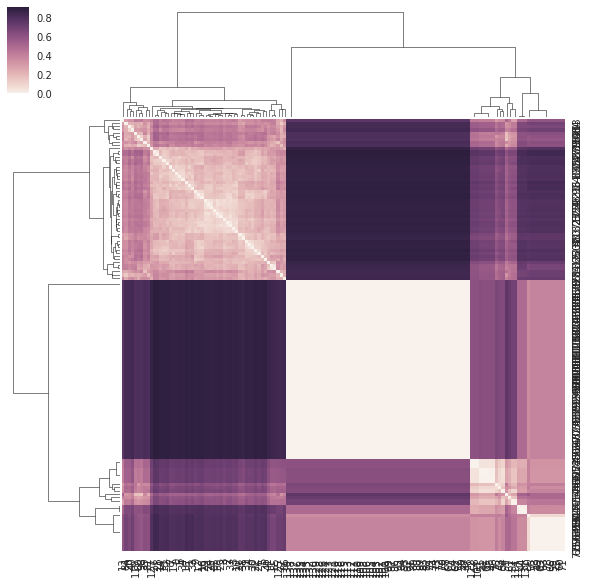

In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

plt.figure()
plt.clf()
import seaborn as sns
sns.set()
sns.clustermap(isi_distance)#,vmin=-,vmax=1);
#plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


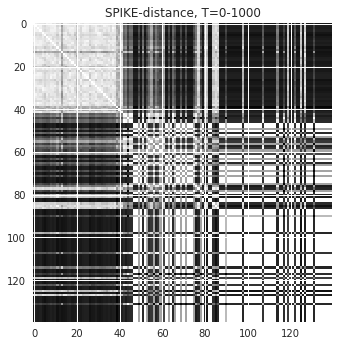

/opt/conda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, float(tstop)))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")

#plt.imshow(isi_distance, interpolation='none')
#plt.title("ISI-distance")
plt.show()

plt.figure()
plt.clf()
import seaborn as sns
sns.set()
sns.clustermap(spike_distance);
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, float(tstop)))
plt.imshow(spike_sync, interpolation='none')
plt.show()

plt.figure()
plt.clf()

sns.clustermap(spike_sync);

#plt.title("SPIKE-Sync, T=2000-4000")
plt.show()

In [ ]:
import pickle
with open('bool_matrix.p','rb') as f:
   m = pickle.load(f)
print(type(m))
print(m)

#plt.figure()
#plt.imshow(spike_sync, interpolation='none')
sns.clustermap(m);

#plt.title("SPIKE-Sync, T=2000-4000")
plt.show()


plt.figure()
plt.clf()
plt.imshow(m, interpolation='none')
plt.title("connection matrix")
plt.show()
